In [9]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt
import glob
import cv2
import mmdet
from mmdet.apis import init_detector, inference_detector
from mmdet.datasets import replace_ImageToTensor, build_dataset, build_dataloader
from mmdet.datasets.pipelines import Compose
from mmdet.core import bbox_cxcywh_to_xyxy, bbox_xyxy_to_cxcywh, bbox_xyxy_to_cxcywh
from tqdm import tqdm
import pickle
from mmdet.core.bbox.iou_calculators.iou2d_calculator import BboxOverlaps2D
import lap
import json
import cv2
from bounding_box import bounding_box as bb
import os
import scipy

In [3]:
with open('../../logs/detr_r50_8x2_150e_coco/merged_outputs_075.json', 'r') as f:
    results = json.load(f)

In [4]:
list(results.keys())[20:30]

['000000143931.jpg',
 '000000303818.jpg',
 '000000463730.jpg',
 '000000460347.jpg',
 '000000322864.jpg',
 '000000153299.jpg',
 '000000308394.jpg',
 '000000456496.jpg',
 '000000041888.jpg',
 '000000184321.jpg']

In [5]:
with open('../../checkpoints/output_detr_r50_8x2_150e_coco_20201130_194835-2c4b8974.pkl', 'rb') as file:
    base_detr_output = pickle.load(file)

In [6]:
base_detr_output[28]

{'filename': 'data/coco/val2017/000000041888.jpg',
 'ori_filename': '000000041888.jpg',
 'ori_shape': (480, 640, 3),
 'img_shape': (800, 1067, 3),
 'pad_shape': (800, 1067, 3),
 'scale_factor': array([1.6671875, 1.6666666, 1.6671875, 1.6666666], dtype=float32),
 'flip': False,
 'flip_direction': None,
 'img_norm_cfg': {'mean': array([123.675, 116.28 , 103.53 ], dtype=float32),
  'std': array([58.395, 57.12 , 57.375], dtype=float32),
  'to_rgb': True},
 'batch_input_shape': (800, 1067),
 'query_embeds': array([[[ 0.32945874, -0.6736954 ,  2.4574533 , ...,  0.9843866 ,
          -0.38511536, -0.16336448],
         [ 0.8814495 , -0.6033929 ,  2.0933783 , ...,  1.1793287 ,
           0.01511363, -0.02949435],
         [ 0.0865678 ,  0.9523293 ,  2.0003865 , ..., -0.56162006,
          -1.50871   , -0.1250172 ],
         ...,
         [-0.31318292, -0.1756062 ,  2.8757439 , ...,  0.2808414 ,
          -0.7343154 , -0.04818906],
         [ 1.4016019 ,  1.0596517 ,  2.064841  , ...,  0.773197

In [7]:
gt_bboxes = base_detr_output[0]['gt_bboxes']
print(len(gt_bboxes))

19


In [8]:
img_filename = '000000041888'

3


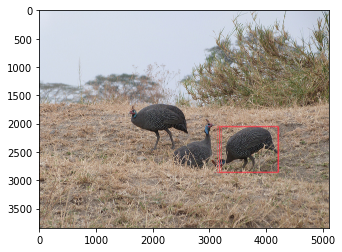

In [15]:

in_path = '../../data/coco/val2017/%s.jpg' % img_filename
# out_path = os.path.join("docs", "images", "winton_bb.png")
image = cv2.imread(in_path, cv2.IMREAD_COLOR)

zoom_factor = 8
image = scipy.ndimage.zoom(image, zoom=(zoom_factor, zoom_factor, 1), order=3)

img_results = results['%s.jpg'%img_filename]
print(len(img_results[1]))
clusters = img_results[1][-1]

for result in clusters:    
    bb.add(image, result[-4]*zoom_factor, result[-3]*zoom_factor, result[-2]*zoom_factor, result[-1]*zoom_factor, " ", "red")

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
print(image.shape)

(1920, 2560, 12)


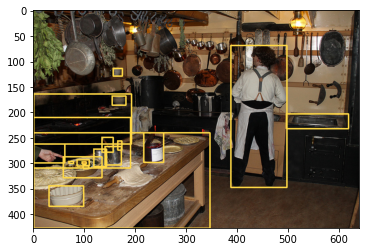

In [120]:
in_path = '../../data/coco/val2017/%s.jpg' % img_filename
# out_path = os.path.join("docs", "images", "winton_bb.png")
image = cv2.imread(in_path, cv2.IMREAD_COLOR)
gt_bboxes = gt_bboxes.tolist()

for result in gt_bboxes:    
    bb.add(image, result[-4], result[-3], result[-2], result[-1], " ", "yellow")

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [115]:
x = img_results[1]
cluster_variances = [torch.tensor(x[i])[:, -4:].var(dim=0) for i in range(len(x))]

In [116]:
torch.stack(cluster_variances)

tensor([[8.9314e-01, 4.9284e-01, 2.5549e+00, 1.6187e+00],
        [8.7007e+00, 1.0992e+00, 9.1313e-01, 5.9930e-01],
        [6.0382e-01, 2.1376e-01, 5.9403e-01, 2.2420e-01],
        [1.6756e-01, 7.2979e-01, 3.3703e-01, 1.3148e+00],
        [5.6862e-01, 4.6406e-01, 1.1836e+00, 1.4102e+00],
        [1.6374e+00, 6.0028e-01, 5.5368e-01, 1.5400e+00],
        [9.7070e-02, 1.5091e+01, 1.4520e+01, 1.6778e+00],
        [6.9436e-01, 3.3302e-01, 1.0956e+00, 4.4686e-01],
        [2.5376e+00, 1.4838e-01, 2.9233e+00, 6.2057e-01],
        [4.7893e+00, 5.6519e+00, 1.5009e+00, 1.8742e+01],
        [8.0846e-01, 1.1047e+02, 2.4248e+00, 2.1656e+00],
        [4.5374e-01, 1.3028e+00, 4.4836e+00, 1.9595e-01],
        [2.1957e-02, 6.6071e-01, 7.5053e-01, 3.3165e+00],
        [3.0197e+00, 1.0497e+00, 2.5373e+00, 5.0630e-01],
        [6.0754e-01, 2.0265e-01, 3.3924e-01, 9.9434e-02],
        [3.4964e-01, 9.1986e-01, 3.5371e-01, 1.3586e-01],
        [1.8441e+01, 8.6185e+00, 4.0457e+00, 4.3164e+01],
        [6.076

In [109]:
with open('../../logs/detr_r50_8x2_150e_coco/bbox_scores_model_1.json', 'r') as f:
    results = json.load(f)

In [111]:
results['%s.jpg' % img_filename]

[[5.388464160205331e-06,
  5.389014404499903e-06,
  1.1846461802633712e-06,
  8.597206502258814e-09,
  1.1056453331548255e-05,
  1.5575154499458677e-09,
  1.016986516333418e-06,
  7.682611879999968e-08,
  1.4169632777338848e-05,
  6.216517931534327e-07,
  7.838441717922251e-08,
  3.0643587933809613e-07,
  6.171920752251481e-10,
  1.6451215287816012e-06,
  0.9993100166320801,
  2.3528573365183547e-05,
  1.7494182884547627e-06,
  3.3988590075750835e-07,
  7.4117674557783175e-06,
  5.307332685333677e-06,
  8.282931048597675e-06,
  3.014337835338665e-06,
  1.7001515516312793e-05,
  7.993738836375996e-05,
  7.8799644143146e-08,
  1.331358134848415e-06,
  1.0336959377355015e-07,
  1.7546998520856505e-08,
  2.0254258714658135e-08,
  1.9406055429271873e-08,
  4.38273950464918e-09,
  2.5873478914917314e-09,
  1.595606846649389e-07,
  1.986517872865079e-06,
  9.784923982181226e-10,
  4.815797760571172e-11,
  6.351472734422714e-07,
  1.9058926170600898e-07,
  2.043114051275552e-07,
  8.2156549296

3


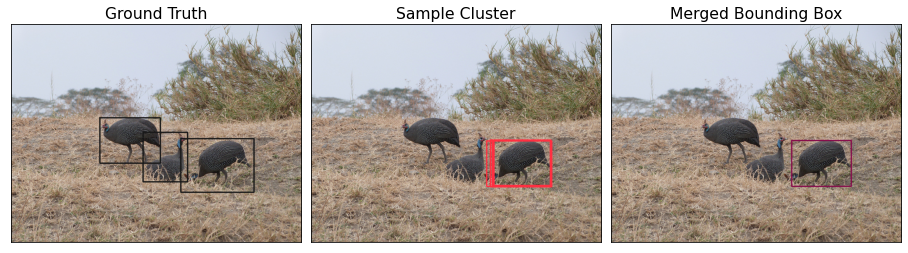

In [41]:
with open('../../logs/detr_r50_8x2_150e_coco/merged_outputs_075.json', 'r') as f:
    results = json.load(f)

plt.rcParams.update({'font.size': 13})

fig, axes = plt.subplots(1, 3, figsize=(12.5, 4.5), constrained_layout=True)
# fig.tight_layout()
in_path = '../../data/coco/val2017/%s.jpg' % img_filename
# out_path = os.path.join("docs", "images", "winton_bb.png")
zoom_factor = 1

image = cv2.imread(in_path, cv2.IMREAD_COLOR)
image = scipy.ndimage.zoom(image, zoom=(zoom_factor, zoom_factor, 1), order=3)
gt_bboxes = base_detr_output[28]['gt_bboxes'].tolist()
# gt_bboxes = gt_bboxes.tolist()

for result in gt_bboxes:    
    bb.add(image, result[-4]*zoom_factor, result[-3]*zoom_factor, result[-2]*zoom_factor, result[-1]*zoom_factor, " ", "black")

axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Ground Truth')


in_path = '../../data/coco/val2017/%s.jpg' % img_filename
# out_path = os.path.join("docs", "images", "winton_bb.png")
image = cv2.imread(in_path, cv2.IMREAD_COLOR)
image = scipy.ndimage.zoom(image, zoom=(zoom_factor, zoom_factor, 1), order=3)

img_results = results['%s.jpg'%img_filename]
print(len(img_results[1]))
clusters = img_results[1][-1]

average = [0, 0, 0, 0]
for result in clusters:    
    bb.add(image, result[-4]*zoom_factor, result[-3]*zoom_factor, result[-2]*zoom_factor, result[-1]*zoom_factor, " ", "red")
    # average[0] = average[0] + result[-4]
    # average[1] = average[1] + result[-3]
    # average[2] = average[2] + result[-2]
    # average[3] = average[3] + result[-1]

# average = average/float(len(clusters))
axes[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[1].set_title("Sample Cluster")
axes[1].set_xticks

in_path = '../../data/coco/val2017/%s.jpg' % img_filename
# out_path = os.path.join("docs", "images", "winton_bb.png")
image = cv2.imread(in_path, cv2.IMREAD_COLOR)
image = scipy.ndimage.zoom(image, zoom=(zoom_factor, zoom_factor, 1), order=3)

# bb.add(image, average[0], average[1], average[2], average[3], "yellow")
bb.add(image, img_results[0][-1][-5]*zoom_factor, img_results[0][-1][-4]*zoom_factor, img_results[0][-1][-3]*zoom_factor, img_results[0][-1][-2]*zoom_factor, " ", "maroon")
axes[2].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[2].set_title('Merged Bounding Box')

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    
plt.savefig('merging_illustration.pdf', format='pdf', bbox_inches='tight')

# plt.show()

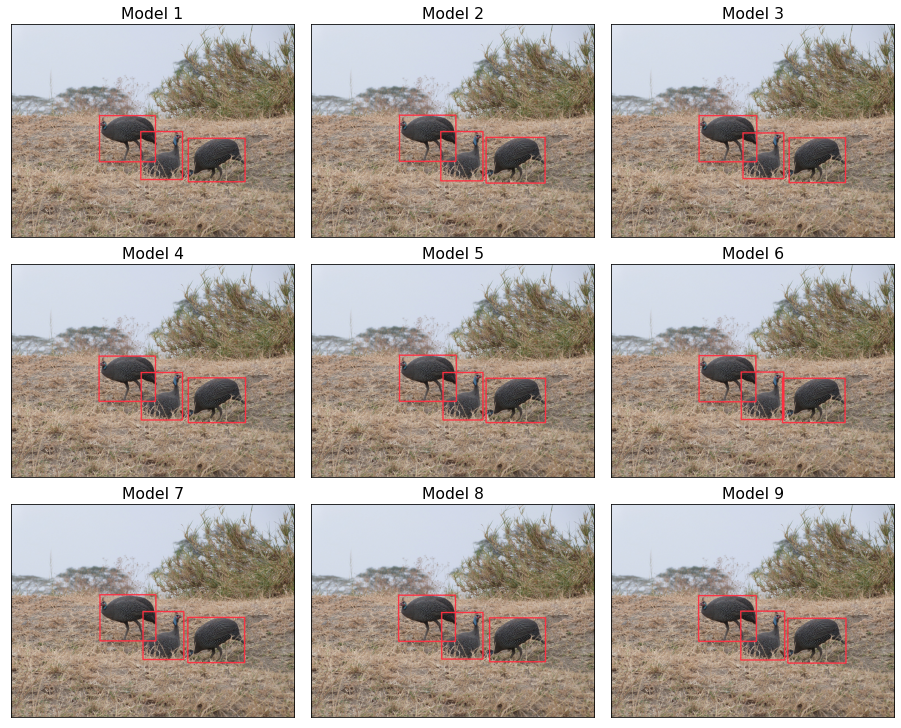

In [42]:
fig, axes = plt.subplots(3, 3, figsize=(12.5, 10.), constrained_layout=True)
# fig.tight_layout()
in_path = '../../data/coco/val2017/%s.jpg' % img_filename
# out_path = os.path.join("docs", "images", "winton_bb.png")

for i in range(9):
    with open('../../logs/detr_r50_8x2_150e_coco/bbox_scores_model_%d.json'% (i+1), 'r') as f:
        results = json.load(f)
    results = results['%s.jpg' % img_filename]
    image = cv2.imread(in_path, cv2.IMREAD_COLOR)
    for result in results:    
        # import pdb
        # pdb.set_trace()
        bb.add(image, result[-5], result[-4], result[-3], result[-2], " ", "red")

    axes[int(i//3)][int(i%3)].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[int(i//3)][int(i%3)].set_title("Model %d" % (i+1))
    axes[int(i//3)][int(i%3)].set_xticks([])
    axes[int(i//3)][int(i%3)].set_yticks([])
# plt.show()
plt.xticks([])
plt.yticks([])
plt.savefig('individual_model_predictions_illustration.pdf', format='pdf', bbox_inches='tight')